In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [33]:
# Full dataset
df = pd.read_csv('globaltemperature.csv', header=None, skiprows=5, usecols=[0, 1, 2])
df.columns = ["Years", "No Smoothing", "Lowess (5)"]
df.head()

,Years,No Smoothing,Lowess (5)
0,1880,-0.16,-0.09
1,1881,-0.08,-0.12
2,1882,-0.10,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.23


In [34]:
# Partial dataset using years and no smoothing
df_years_no_smoothing = pd.read_csv('globaltemperature.csv', header=None, skiprows=5, usecols=[0, 1])
df_years_no_smoothing.columns = ["Years", "No Smoothing"]
df_years_no_smoothing.head()

,Years,No Smoothing
0,1880,-0.16
1,1881,-0.08
2,1882,-0.10
3,1883,-0.17
4,1884,-0.28


In [35]:
# Dimensions of modified dataset
df_years_no_smoothing.shape

(139, 2)

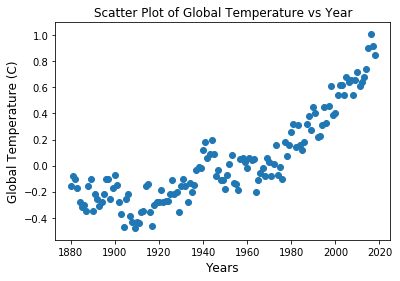

In [65]:
# Years column
years = df_years_no_smoothing.iloc[:,0]
# No_smoothing column
no_smoothing_col = df_years_no_smoothing.iloc[:, 1]

# Plot scatter plot of global temperature across year
plt.scatter(years, no_smoothing_col)
plt.title('Scatter Plot of Global Temperature vs Year')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Global Temperature (C)', fontsize=12)
plt.show()

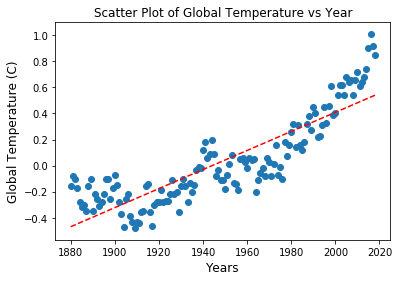

In [37]:
m, b = np.polyfit(years, no_smoothing_col, 1)

def f(x):
    return m * x + b

plt.scatter(years, no_smoothing_col)
plt.plot(years, f(years), "r--")
plt.title('Scatter Plot of Global Temperature vs Year')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Global Temperature (C)', fontsize=12)
plt.show()

In [38]:
x = df_years_no_smoothing['Years'].values
y = df_years_no_smoothing['No Smoothing'].values

model = LinearRegression(fit_intercept=True)
model.fit(x.reshape(-1, 1), y)
print("coefficient = {0}, and intercept = {1}".format(model.coef_[0], 
      model.intercept_))

coefficient = 0.007316591447339025, and intercept = -14.224425220072392


In [72]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y, x)

-32891997.041525263

In [43]:
mean_no_smoothing_col = np.sum(no_smoothing_col) / 139
print(mean_no_smoothing_col)

0.03561151079136695


In [47]:
range_no_smoothing_col = np.max(no_smoothing_col) - np.min(no_smoothing_col)
print(np.max(no_smoothing_col), "-", np.min(no_smoothing_col), "=", range_no_smoothing_col)

1.01 - -0.48 = 1.49


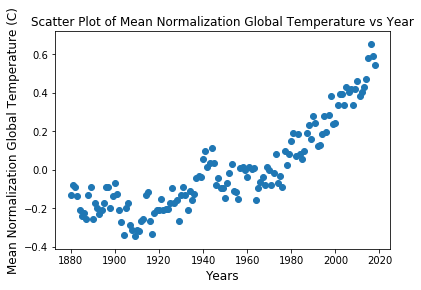

In [58]:
# Mean normalization
mean_norm_no_smoothing_col = (no_smoothing_col - mean_no_smoothing_col) / range_no_smoothing_col

# Plot
plt.scatter(years, mean_norm_no_smoothing_col)
plt.title('Scatter Plot of Mean Normalization Global Temperature vs Year')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Mean Normalization Global Temperature (C)', fontsize=12)
plt.show()

In [70]:
mean_norm_y = mean_norm_no_smoothing_col.values

mean_norm_model = LinearRegression(fit_intercept=True)
mean_norm_model.fit(x.reshape(-1, 1), mean_norm_y)
print("coefficient = {0}, and intercept = {1}".format(mean_norm_model.coef_[0], 
      mean_norm_model.intercept_))

coefficient = 0.004910464058616795, and intercept = -9.570494450244134


In [73]:
r2_score(mean_norm_y, x)

-73026339.00033595